Import Required Libraries

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Uploading of Dataset

In [2]:
dataset=pd.read_csv('creditcard.csv')

Preprocessing of Dataset

In [9]:
scaler=StandardScaler()
x=scaler.fit_transform(dataset.values)
y=x #autoencoder input and output are same
x_train,x_test,_,_=train_test_split(x,x,test_size=0.2,random_state=42)

In [10]:
input_dim=x_train.shape[1]

Encoder converts into latent representation

In [12]:
encoder=models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(8,activation="relu")
])

Decoder converts it back to original input

In [13]:
decoder=models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(input_dim,activation="linear")
])

Compile the Model using Optimizer,Loss,Evaluation ,metrics

In [14]:
autoencoder=models.Sequential([
    encoder,
    decoder
])

In [16]:
autoencoder.compile(loss="mean_squared_error",optimizer="Adam")

In [17]:
autoencoder.fit(x_train,x_train,epochs=100,shuffle="True")

Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.6576
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3938
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3476
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3183
Epoch 5/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3036
Epoch 6/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2857
Epoch 7/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2741
Epoch 8/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2675
Epoch 9/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2629
Epoch 10/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2561
Epoch 11/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 0.2490
Epoch 12/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2454
Epoch 13/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 0.2444
Epoch 14/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2374
E

Finding Anomalies to Evaluate Model

In [18]:
y_pred=autoencoder.predict(x_test)
mse=np.mean(np.power(x_test-y_pred,2),axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Defining threshold and mse above threshold as anomalies 

In [19]:
threshold=np.percentile(mse,95)
anomalies=mse>threshold
total_anomalies=np.sum(anomalies)
print("Total No. of Anamolues:",total_anomalies)

Total No. of Anamolues: 2849


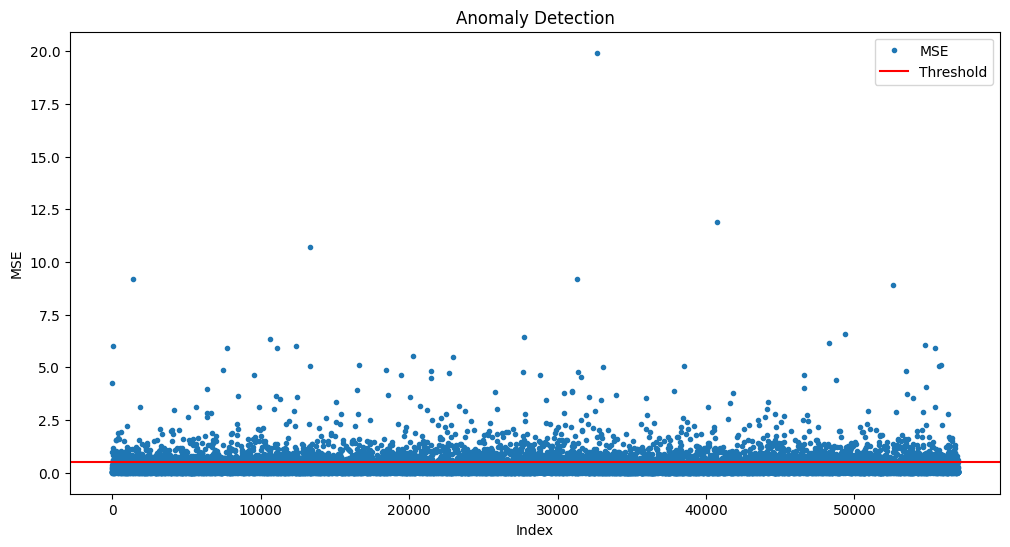

In [25]:
plt.figure(figsize=(12,6))
plt.plot(mse,label="MSE",marker='o',linestyle='',markersize=3)
plt.axhline(threshold,label="Threshold",color="red")
plt.xlabel("Index")
plt.ylabel("MSE")
plt.title("Anomaly Detection")
plt.legend()
plt.show()

Evaluate the Model

In [26]:
y_true=np.zeros(len(x_test))
print("Confusion Matrix:")
print(confusion_matrix(anomalies,anomalies))

print("Classification Report:")
print(classification_report(anomalies,anomalies))

Confusion Matrix:
[[54113     0]
 [    0  2849]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     54113
        True       1.00      1.00      1.00      2849

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Draw the Confusion Matrix

In [30]:
import seaborn as sns

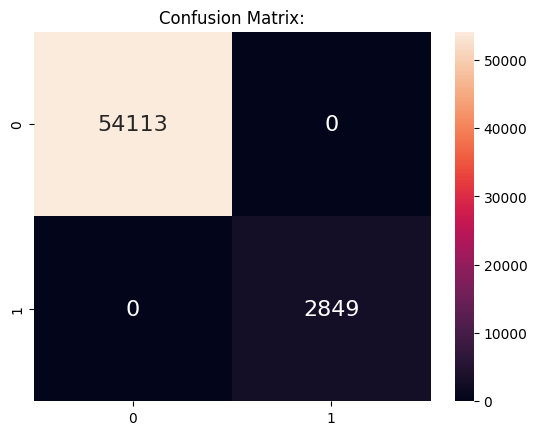

In [35]:
plt.xlabel("Predicted_Class")
plt.ylabel("True_Class")
plt.title("Confusion Matrix:")
sns.heatmap(confusion_matrix(anomalies,anomalies),annot=True,annot_kws ={"size": 16},fmt='d')
plt.show()

In [44]:
accuracy = accuracy_score(anomalies, anomalies)
print(accuracy)

1.0


In [42]:
precision_score=precision_score(anomalies, anomalies)
print(precision_score)

1.0


In [43]:
recall_score=recall_score(anomalies, anomalies)
print(recall_score)

1.0
